ValueError: not enough values to unpack (expected 2, got 1)

Total models: 20
Group 1 indices: [0, 1, 2, 3, 4] (size: 5)
Group 2 indices: [5, 6, 7, 8, 9, 10, 11, 12, 13] (size: 9)
Group 3 indices: [14, 15, 16, 17, 18, 19] (size: 6)


/tmp/ipykernel_2438983/417778630.py:203: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(


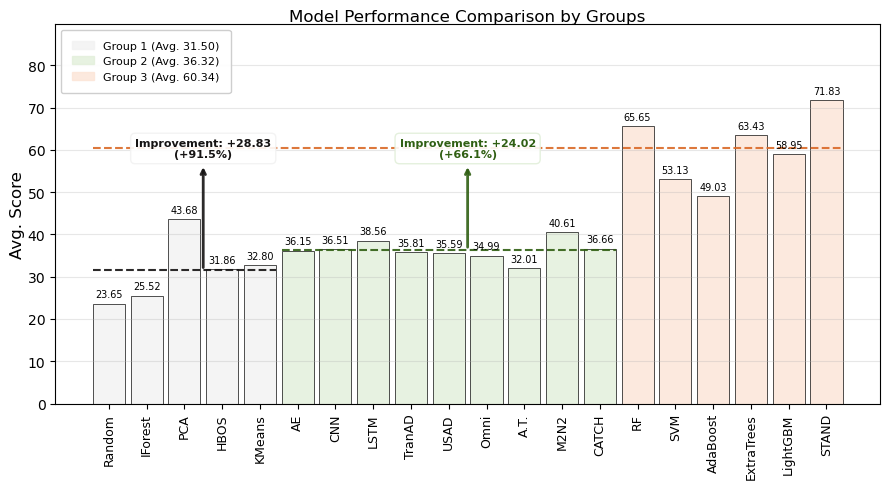


Group Statistics:
Group 1 (First 5 models): Avg = 31.50, Range = 23.65-43.68
Group 2 (Remaining 9 models): Avg = 36.32, Range = 32.01-40.61
Group 3 (Last 6 models): Avg = 60.34, Range = 49.03-71.83
Improvement Metrics (Group 3 vs Others):
vs Group 1: +28.83 (91.5%)
vs Group 2: +24.02 (66.1%)


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 全局设置（无中文，使用默认英文字体）
# plt.rcParams['axes.unicode_minus'] = False

# 原始数据
data = """23.65 	Random
25.52 	IForest
43.68 	PCA
31.86 	HBOS
32.80 	KMeans
36.15 	AE
36.51 	CNN
38.56 	LSTM
35.81 	TranAD
35.59 	USAD
34.99 	Omni
32.01 	A.T.
40.61 	M2N2
36.66 	CATCH
65.65 	RF
53.13 	SVM
49.03 	AdaBoost
63.43 	ExtraTrees
58.95 	LightGBM
71.83 	STAND"""

# 数据处理（确保正确分割和转换）
data_lines = [line.strip() for line in data.split("\n") if line.strip()]
def parse_line(t):
    parts = t.split("\t")
    if len(parts) != 2:
        raise ValueError(f"Invalid line format: {t}")
    name, val = parts[0].strip(), parts[1].strip()
    return val, float(name)  # 修正：原始数据是 "分数\t模型名"，之前顺序反了！

# 解析数据并保持原始顺序
models_scores = list(map(parse_line, data_lines))
models = [x[0] for x in models_scores]  # 模型名
scores = [x[1] for x in models_scores]  # 分数值

# 确认数据长度
print(f"Total models: {len(models)}")  # 应该是20个

# 正确的分组逻辑（关键修复！）
n_total = len(models)
group1_size = 5  # 前5个：Group 1
group3_size = 6  # 后6个：Group 3
group1_indices = list(range(group1_size))  # [0,1,2,3,4]
group3_indices = list(range(n_total - group3_size, n_total))  # [14,15,16,17,18,19]
group2_indices = [i for i in range(n_total) if i not in group1_indices + group3_indices]  # [5-13]

# 验证分组
print(f"Group 1 indices: {group1_indices} (size: {len(group1_indices)})")
print(f"Group 2 indices: {group2_indices} (size: {len(group2_indices)})")
print(f"Group 3 indices: {group3_indices} (size: {len(group3_indices)})")

# 提取各组数据
group1_scores = [scores[i] for i in group1_indices]
group2_scores = [scores[i] for i in group2_indices]
group3_scores = [scores[i] for i in group3_indices]

# 计算各组平均分
group1_avg = np.mean(group1_scores)
group2_avg = np.mean(group2_scores)
group3_avg = np.mean(group3_scores)

# 计算提升幅度（第三组相对其他组）
improvement_vs_group1 = group3_avg - group1_avg
improvement_vs_group2 = group3_avg - group2_avg
improvement_pct_vs_group1 = (improvement_vs_group1 / group1_avg) * 100
improvement_pct_vs_group2 = (improvement_vs_group2 / group2_avg) * 100

# 设置图表样式（优化布局和可读性）
plt.figure(figsize=(9, 5))
bar_width = 0.85
colors = ['#F2F2F2', '#E2EFDA', '#FCE4D6']  # Group1: Blue, Group2: Red, Group3: Green
colors2 = ["#151313", "#305F13", "#DA6927"] 
lin2 = 1.5

# 为每个模型分配对应组的颜色
all_colors = []
for i in range(n_total):
    if i in group1_indices:
        all_colors.append(colors[0])
    elif i in group2_indices:
        all_colors.append(colors[1])
    else:
        all_colors.append(colors[2])

# 绘制柱状图（按原始顺序）
bars = plt.bar(
    range(n_total), 
    scores, 
    width=bar_width, 
    color=all_colors, 
    alpha=0.8, 
    edgecolor='black', 
    linewidth=0.6,
)



# 添加分组平均虚线（覆盖每组的完整宽度）
# Group 1 average line
x1_start = group1_indices[0] - bar_width/2
x1_end = group1_indices[-1] + bar_width/2
plt.plot(
    [x1_start, x1_end], 
    [group1_avg, group1_avg], 
    '--', color=colors2[0], linewidth=lin2, alpha=0.9,
    # label=f'Group 1 Avg: {group1_avg:.2f}'
)

# Group 2 average line
x2_start = group2_indices[0] - bar_width/2
x2_end = group2_indices[-1] + bar_width/2
plt.plot(
    [x2_start, x2_end], 
    [group2_avg, group2_avg], 
    '--', color=colors2[1], linewidth=lin2, alpha=0.9,
    # label=f'Group 2 Avg: {group2_avg:.2f}'
)

# Group 3 average line
x3_start = group3_indices[0] - bar_width/2
x3_end = group3_indices[-1] + bar_width/2
plt.plot(
    [x1_start, x3_end], 
    [group3_avg, group3_avg], 
    '--', color=colors2[2], linewidth=lin2, alpha=0.9,
    # label=f'Group 3 Avg: {group3_avg:.2f}'
)

# 添加提升箭头和标注（优化位置，避免遮挡）
# 第三组 vs 第一组（箭头放在两组之间的中间位置）
arrow_x1 = (group1_indices[0] + group2_indices[0]) / 2
x_offset = 0.3
plt.annotate(
    f'Improvement: +{improvement_vs_group1:.2f}\n(+{improvement_pct_vs_group1:.1f}%)',
    xy=(arrow_x1, group1_avg),
    xytext=(arrow_x1, group3_avg),
    arrowprops=dict(
        arrowstyle='<-', lw=2, color=colors2[0], alpha=0.9,
        shrinkA=2, shrinkB=2  # 箭头与线的间距
    ),
    ha='center', va='center', fontsize=8, fontweight='bold',color=colors2[0],
    bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor=colors[0])
)

# 第三组 vs 第二组（箭头放在两组之间的中间位置）
# offset2 = (group2_indices[0] + group2_indices[-1])/2
arrow_x2 = (group2_indices[0] + group3_indices[0]) / 2
plt.annotate(
    f'Improvement: +{improvement_vs_group2:.2f}\n(+{improvement_pct_vs_group2:.1f}%)',
    xy=(arrow_x2, group2_avg),
    xytext=(arrow_x2, group3_avg),
    arrowprops=dict(
        arrowstyle='<-', lw=2, color=colors2[1], alpha=0.9,
        shrinkA=2, shrinkB=2
    ),
    ha='center', va='center', fontsize=8, fontweight='bold', color=colors2[1],
    bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor=colors[1])
)

# 设置坐标轴和标题
# plt.xlabel('Models', fontsize=12, fontweight='normal', labelpad=2)
plt.ylabel('Avg. Score', fontsize=12, fontweight='normal', labelpad=2)
plt.title('Model Performance Comparison by Groups', fontsize=12, fontweight='normal', pad=2)

# X轴标签（优化旋转角度和字体大小）
plt.xticks(
    range(n_total), 
    models, 
    rotation=90, 
    ha='center', 
    fontsize=9, 
    fontweight='medium'
)

# Y轴设置（从0开始，留出足够空间给标注）
plt.ylim(0, max(scores) * 1.25)

# 添加所有模型的数值标签（优化位置，避免重叠）
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1.,  # 数值在柱子上方1.5的位置
        f'{score:.2f}',
        ha='center',
        va='bottom',
        fontsize=7,
        # fontweight='bold'
    )

# 图例（优化位置和样式）
legend_elements = [
    plt.Rectangle((0,0),1,1, color=colors[0], alpha=0.8, label=f'Group 1 (Avg. {group1_avg:.2f})'),
    plt.Rectangle((0,0),1,1, color=colors[1], alpha=0.8, label=f'Group 2 (Avg. {group2_avg:.2f})'),
    plt.Rectangle((0,0),1,1, color=colors[2], alpha=0.8, label=f'Group 3 (Avg. {group3_avg:.2f})')
]
plt.legend(
    handles=legend_elements + plt.gca().get_lines(),
    loc='upper left',
    fontsize=8,
    framealpha=0.95,
    shadow=False,
    borderpad=1.0,
)

# 添加横向网格线（提升可读性）
plt.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.8)

# 调整布局（防止标签被截断）
plt.tight_layout()

# 保存图片（高分辨率）

plt.savefig('./plots/comparison.pdf', dpi=400, bbox_inches='tight')
plt.savefig('./plots/comparison.png', dpi=400, bbox_inches='tight')

# 显示图片
plt.show()

# 输出详细统计信息（控制台）
print("\n" + "="*60)
print("Group Statistics:")
print(f"Group 1 (First 5 models): Avg = {group1_avg:.2f}, Range = {min(group1_scores):.2f}-{max(group1_scores):.2f}")
print(f"Group 2 (Remaining {len(group2_indices)} models): Avg = {group2_avg:.2f}, Range = {min(group2_scores):.2f}-{max(group2_scores):.2f}")
print(f"Group 3 (Last 6 models): Avg = {group3_avg:.2f}, Range = {min(group3_scores):.2f}-{max(group3_scores):.2f}")
print("="*60)
print("Improvement Metrics (Group 3 vs Others):")
print(f"vs Group 1: +{improvement_vs_group1:.2f} ({improvement_pct_vs_group1:.1f}%)")
print(f"vs Group 2: +{improvement_vs_group2:.2f} ({improvement_pct_vs_group2:.1f}%)")
print("="*60)